# An MBA company with a 1 year long existence, is negotiating a huge deal with the government, after a really good debut in the sector. They want to create an agreement with the government to receive the public university students with good discounts for them, in exchange of free advertising in the different medias. They are preparing a win-win agreement, and they have contracted us to create an analytic schedule of the development during this first year, of the different sectors of the MBA. We have prepared different functions and graphics, to show how the environment of this MBA is.

In [1]:
import pandas as pd
import src.stud_analysis as stud
import src.MBA_analysis as mba
import numpy as np
import random
MBA = pd.read_csv("MBA.csv")
import seaborn as sns
import matplotlib.pyplot as plt

## We have created two libraries, with different functions:

###  -The first library, called stud_analysis (we call it as "stud"), has diverse functions to analyse  the whole 215 students that have graduated in the MBA during this first year. To show our stud_analysis functions, we will choose randomly a student as example.

In [2]:
print(random.randrange(216))

77


-Our selected student is the one with Student ID: 155

Function 1: workexp(x)--> With this function, introducing his Student ID, we can know if the
student had Working Experience before the MBA.

In [3]:
stud.workexp(155)

,Work Experience
154,Yes


Function 2: sMBA(a)--> With this function, introducing his Student ID, we can know the MBA 
he has studied

In [4]:
stud.sMBA(155)

,MBA
154,Mkt&Fin


Function 3: sMBAavg(a)->With this funcion, introducing his Student ID, we can know the average
MBA grades of the student

In [5]:
stud.sMBAavg(155)

,MBA avg
154,53.2


Function 4: sstatus(a)->With this function, introducing his student ID, we can know if the 
student is currently working.

In [6]:
stud.sstatus(155)

,Status
154,Placed


Function 5: studinfo(a,b)-> With this function, we can know any other available information 
about the student, introducing his Student ID as {a}, and the number of the other column as 
{b}


In [7]:
stud.studinfo(155,2)

,Gender
154,M


In [8]:
stud.studinfo(155,3)

,HS Speciality
154,Science


In [9]:
stud.studinfo(155,4)

,HS avg
154,63.0


### -Our second library is used to analyse the MBA type development during the year. Its name is MBA_analysis, an we call it with "mba". To analyse the function, we will use the Marketing and Human Resources MBA.

Function 1: genderMBA(a)-> With this function, we can know the number of people from each
gender who have studied the introduced MBA type. With it, we can have an idea of the 
distribution, if it is more likable for one gender, the other, or both.

In [10]:
mba.genderMBA("Mkt&HR")

,Gender
M,56
F,39


Function 2: statusMBA(a)--> With this function, we can know the status of the MBA type students
of that promotion. With it, we can have an idea of the level of requirement it has in the 
laboral world

In [11]:
mba.statusMBA("Mkt&HR")

,Status
Placed,53
Not Placed,42


Function 3: degreeMBA(a)->With this function, we can know the degree students of this MBA 
type studied in University. It is a good information for the government, as it gives 
information about the profiles and sectors of students that likely studies it.

In [12]:
mba.degreeMBA("Mkt&HR")

,Degree
Comm&Mgmt,59
Sci&Tech,29
Others,7


Function 4: avgMBA(a)--> With this function, we can know the average qualification of the 
whole group of students of one MBA type. With it, we can have an idea of the difficulty it has.


In [13]:
mba.avgMBA("Mkt&HR")

61.58663157894736

## We have also created some graphic representation of information about this first year of the MBA

### Grades distribution

In this first graph, we can observe the dispersion and the media of the students grades in
both types of MBAs. It is interesting because we can see the difficulty and the class student 
level in both. In Marketing and Finances, there is more level, but the dispersion is also 
bigger. In the other hand, Marketing and Human Resources has a more leveled class.


<AxesSubplot:xlabel='MBA avg', ylabel='MBA'>

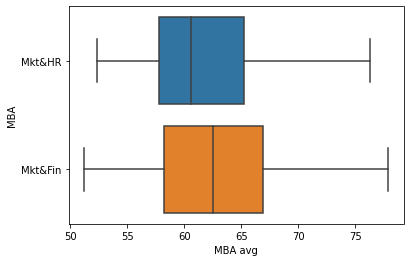

In [14]:
sns.boxplot(x = "MBA avg",y = "MBA",data = MBA)

### Degree VS MBA average 

This next graph measures the relationship between the average grades the students had during
their university degree, and the average grades they have had in the MBA. We can observe that
there is a lot of dispersion, which tells us that you dont necesarilly have to have good
results in the MBA because you had them in the university. The average of the university was
slightly higher, which indicates that the MBA is difficult and demands effort.

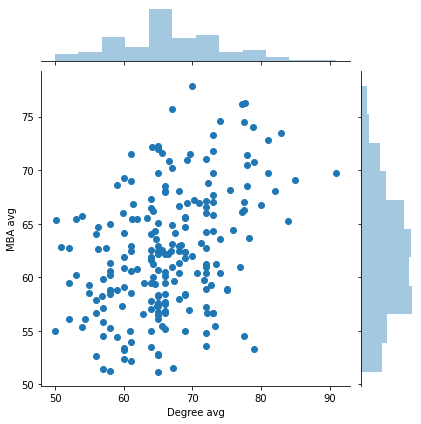

In [15]:
sns.jointplot("Degree avg","MBA avg",MBA)

### MBA Gender distribution 

In this next graph, we can observe the number of students from each gender who have studied both MBAs. We see that Marketing and Finances is much more studied by Males, and Marketing and
Human Resources has a more equalized student gender.

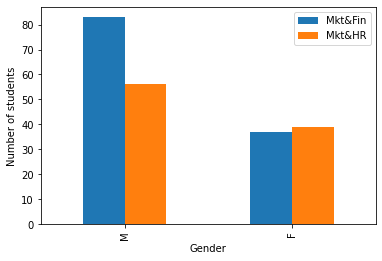

In [16]:
x = MBA[MBA["MBA"]=="Mkt&HR"]["Gender"]
X = x.value_counts()
X1 = pd.DataFrame(X)
X2 = X1.rename(columns={"Gender":"Mkt&HR"})
y = MBA[MBA["MBA"]=="Mkt&Fin"]["Gender"]
Y = y.value_counts()
Y1 = pd.DataFrame(Y)
Y1.rename(columns={"Gender":"Mkt&Fin"})
Y2 = Y1.rename(columns={"Gender":"Mkt&Fin"})
a = pd.concat([Y2,X2],axis=1)
a.plot.bar()
plt.ylabel("Number of students")
plt.xlabel("Gender")
plt.savefig("GenderBar.png")

### Salary ranges 

In this last graph, we can observe the distribution of salaries of the Placed graduated
students of the MBA. Most of them have between $200.000  and  $300.000 earning. Also a lot 
are between the $300.000  and  $400.000 range, and then the number of people earning more
decreases seriously.

([<matplotlib.patches.Wedge at 0x1254db2e8>,
 [Text(-0.9113606016987157, 0.6159722832005958, ''),
  Text(0.7611327287461934, -0.7941517293511196, ''),
  Text(1.0583832547241618, -0.29970800142720583, ''),
  Text(1.0960372358402772, -0.09328653521063178, ''),
  Text(1.0997521874386846, -0.02334793832073062, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, '')])

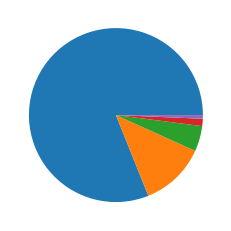

In [17]:
df = pd.read_csv("CLAS.csv")
bining = df["salary"]
BINING = df.dropna(thresh=df.shape[1]-0)
BINING2 = BINING["salary"]
PLOT = pd.cut(BINING2,bins=[199999,300000,400000,500000,600000,700000,800000,900000,1000000],labels=["2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10"])
x = PLOT.value_counts()
r = lambda x : plt.pie(x)
r(x)